## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#2 Check the shape of the DataFrame (rows, columns)

In [3]:
df.shape

(545, 13)

In [ ]:
#3 Look at the data types of the columns

In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
#4 Check for missing  values if any, replace with appropriate values

In [7]:
print(df.isnull())

     price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0       False            False            False    False     Fals

In [9]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#5 Prepare  X (independent variables) and y (dependent variable)

In [83]:
X=df.drop(columns=['price'])
y=df['price']
print("x independent variables:\n",X)
print("y dependent variables:\n",y)

x independent variables:
      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0       

In [13]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

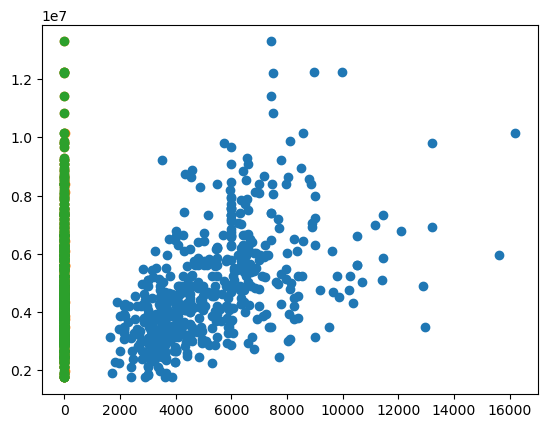

In [119]:
import matplotlib.pyplot as plt
plt.scatter(x['area'],y)

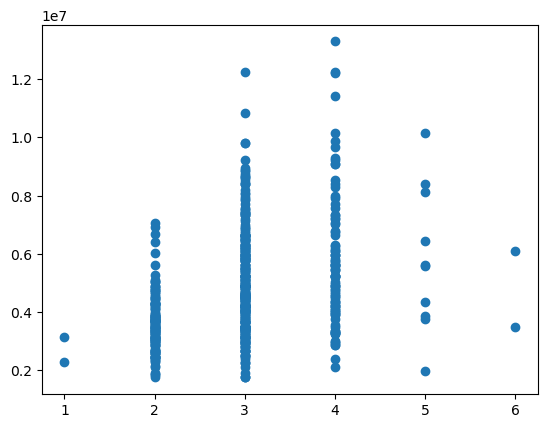

In [122]:
plt.scatter(x['bedrooms'],y)plt.scatter(x['bedrooms'],y)
plt.scatter(x['bathrooms'],y)

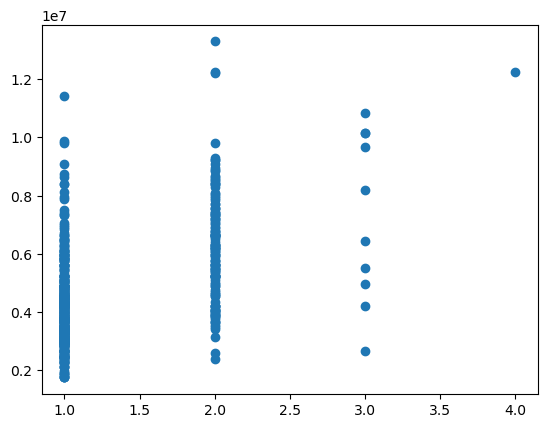

In [124]:
plt.scatter(x['bathrooms'],y)

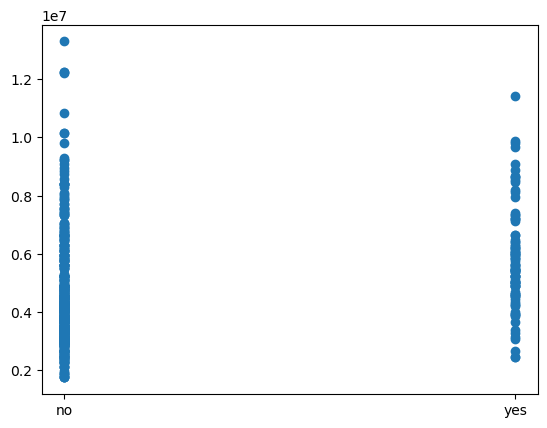

In [126]:
plt.scatter(x['guestroom'],y)

In [ ]:
#7 Encoding categorical data in X

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus'],
      dtype='object')


In [51]:
le = LabelEncoder()
for col in categorical_cols:
    # label_encoders = {}
    df[col] = le.fit_transform(df[col])
    # label_encoders[col] = le
# print(df)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [27]:
#8  Avoiding the Dummy Variable Trap

In [69]:
cleaned_df=pd.get_dummies(df,drop_first=True)
cleaned_df 


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
#9 Apply feature scaling on numerical variables

In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_minmax

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [71]:
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_standardized

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


In [ ]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train:\n", X_train)
print("\ny_train:\n", y_train)
print("\nX_test:\n", X_test)
print("\ny_test:\n", y_test)

X_train:
       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
413   1950         3          2        2         1          0         1   
65    8880         3          2        2         1          0         1   
10   13200         3          1        2         1          0         1   
433   3480         4          1        2         0          0         0   
224  10240         2          1        1         1          0         0   
..     ...       ...        ...      ...       ...        ...       ...   
523   2787         4          2        2         1          0         0   
452   9000         3          1        2         1          0         0   
297   3640         3          2        2         1          0         1   
383   4500         4          2        2         1          0         1   
501   2430         3          1        1         0          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
413         

In [93]:
#11 Fitting Multiple Linear Regression to the Training

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [ 2.55186291e+02  7.12874429e+04  1.00222695e+06  4.05646149e+05
  3.73812558e+05  3.51598781e+05  3.06165446e+05  1.05894890e+06
  9.69503413e+05  2.30718445e+05  6.50802260e+05 -2.88565694e+05]
Intercept: 317573.1409703698


In [ ]:
#12 Predict on the train set and calculate the error = y_pred - y_train

In [103]:
y_train_pred = regressor.predict(X_train)

error = y_train_pred - y_train
print("Predicted y_train:\n", y_train_pred)
print("\nActual y_train:\n", y_train.values)
print("\nError (y_pred - y_train):\n", error.values)


Predicted y_train:
 [ 4598443.81954213  7493435.80136167  8475134.32908677  3246443.20855465
  6359552.48216066  7024707.52659986  6507156.08231747  6675612.73140564
  6978860.32290179  5806507.3363563   5530310.42176139  7116896.033448
  3469155.44433388  4171359.58570223  2935735.21419056  5649758.47993099
  4534589.68957822  3981293.029456    3168535.56536352  3504887.31359928
  2685447.46406064  3124473.01620337  2588476.67351713  6066461.17380407
  4517314.28127516  4927490.76770694  7322017.49557516  3764639.81771614
  6379644.82252756  6859084.52992122  9588476.1742489   6374227.75567166
  6553523.55599882  5096359.14121456  4798166.5979635   8132310.30835954
  2754082.99076276  4259477.61452787  3573613.44075221  5478788.33459028
  3691684.65238418  4351814.63613929  3112864.53825064  6652779.13927319
  4014850.34995851  3576910.25907149  4382542.12283568  2994428.06109848
  2871938.64146457  4952730.32340284  4234105.37509188  7064430.14690071
  7201430.69605255  5279524.90073

In [ ]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

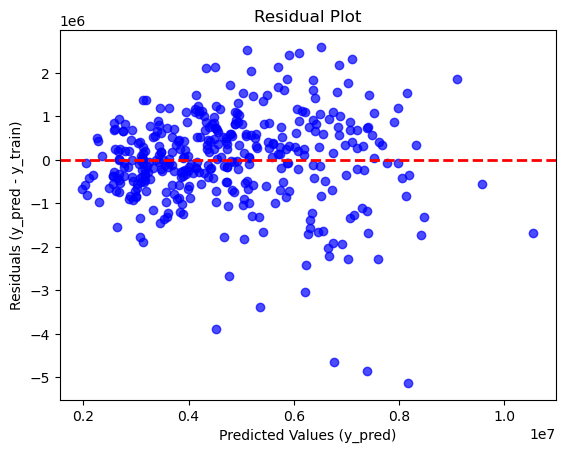

In [107]:
residuals = y_train_pred - y_train
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_pred - y_train)")
plt.title("Residual Plot")
plt.show()

In [ ]:
#14  Predic on the test set

In [109]:
y_test_pred = regressor.predict(X_test)

print("Predicted y_test:\n", y_test_pred)
print("\nActual y_test:\n", y_test.values)

test_residuals = y_test_pred - y_test
print("\nError (y_pred - y_test):\n", test_residuals.values)


Predicted y_test:
 [3647382.0910568  3448394.88706558 5458253.71741219 4094716.74340873
 3916436.58275618 4387722.37406555 2695654.9156968  3675657.76810027
 5660245.32623119 3899558.27224353 2593580.39933521 4616116.97671903
 4832327.3466888  4981528.18234783 3978151.24945912 3511112.61171408
 6029411.28597354 4223109.57997683 5025811.57282748 3560776.90831945
 6315278.78533541 2898358.88240438 5782297.15435242 5767203.33913987
 2497630.35395532 5063169.37293917 5959561.00798481 7625099.21676852
 3256680.208816   3350353.35011159 4183640.6903651  7826659.6351533
 3567980.8126542  3691872.64676069 3746484.63728652 5478518.67281795
 5371205.80231262 6415306.23792442 5151605.81255985 6114641.97248902
 2978482.20817242 4371514.09070795 3916271.86417035 2876837.18223861
 6496511.99026152 5070769.91309022 5918248.63251149 5859935.81306592
 7046347.88505149 6972579.1783091  3132063.93960079 2718456.96329233
 5081282.60302654 4650628.73042493 4170869.86867032 7039702.6132025
 8215210.69778036

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

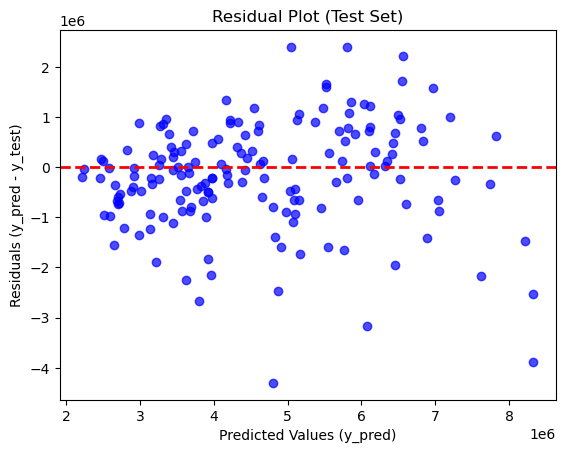

In [111]:
import matplotlib.pyplot as plt

# Calculating residuals (errors) for the test set
test_residuals = y_test_pred - y_test

# Plotting the residual plot for test set
plt.scatter(y_test_pred, test_residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Reference line at 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_pred - y_test)")
plt.title("Residual Plot (Test Set)")
plt.show()


In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)

# Calculating R-squared Value
r2 = r2_score(y_test, y_test_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-Squared Value (R²):", r2)

Mean Squared Error (MSE): 1180270455913.43
R-Squared Value (R²): 0.6157343735452652


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

In [117]:
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = adjusted_r2(r2, n, p)

print("Adjusted R-Squared Value (R²_adj):", adj_r2)

Adjusted R-Squared Value (R²_adj): 0.5851967078667433
